# Лабораторная работа 6. 
 
---

## Цель работы

Изучить метод разностных аппроксимаций для волнового уравнения; Составить программы волнового уравнения по разработанным алгоритмам;
Получить численное решение волнового уравнения.

## Краткие теоретические сведения

Разностная схема для одномерного волнового уравнения

Рассмотрим одномерную математическую модель распространения колебаний на струне. Пусть струна в деформированном состоянии распространяется на интервале $[0,l]$ оси $x$ и $u(x, t)$ — перемещение по времени в направлении $y$ точки, изначально лежащей на оси $x$. Функция перемещения $u(x, t)$ определяется следующей математической моделью:

### $\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}, x \in (0,l), t \in (0, T) - (1)$ 

### $u(x,0)=I(x), x \in (0,l) - (2)$

### $\frac{\partial u(x,0)}{\partial t}, x \in (0,L) - (3)$

### $u(0,t)=0,t \in (0,T) - (4)$

### $u(l,t)=0 - (5)$

Постоянная $c$ и функция $I(x)$ — заданы.
Уравнение $(1)$ известно, как волновое уравнение (уравнение колебаний струны). Так как это уравнение в частных производных содержит вторую производную по времени, необходимо задать два начальных условия. Условие $(2)$ начальную форму струны, а условие $(3)$ означает, что начальная скорость струны равна нулю. Кроме того, уравнение $(1)$ дополняется граничными условиями $(4)$ и $(5)$. Эти два условия означают, что струна закреплена на концах, т.е. перемещения равны нулю.

### Расчетная сетка
Для построения разностной схемы надо прежде всего ввести сетку в области изменения независимых переменных и задать шаблон, т.е. множество точек сетки, участвующих в аппроксимации дифференциального выражения. Введем равномерную сетку по переменному $x$ с шагом $h$

$\omega h = (xi=ih, i0,1,..,N,hN=l$

и сетку по переменному $t$ с шагом $τ$:

$\omega \tau (tn=m,n=0,1,..,K,K\tau=T$

Точки $(xi,tn), i=0,1,..,N, n=0,1,..,K$ , образуют узлы пространственно-временной сетки $\omega h \tau = \omega h * \omega\tau$

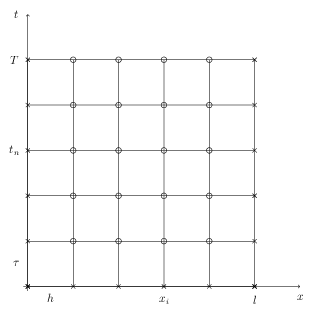

### Разностная схема
Простейшей разностной аппроксимацией уравнения $(1)$ и граничных условий $(4)$ и $(5)$ является следующая система уравнений:

### $\frac{x^{n+1}_i - 2y^{n}_i + y^{n-1}_i }{\tau^2} = \frac{x_{i+1}^n - 2y^{n}_i + y^{n}_{i-1} }{h^2}, i=1,2,..,N-1, n=1,2,..,K$ (6)

### $y^{n+1}_0 = y^{n+1}_N = 0$ (7)

Разностное уравнение $(6)$ имеет второй порядок погрешности аппроксимации по $τ$ и по $h$. Решение  выражается явным образом через значения на предыдущих слоях:

### $y^{n+1}_i = 2y^n_i - y_i^{n-1} + \gamma^2(y^n_{i+1} - 2y^n_i + y^n_{i-1}), i=1,2,..,N-1, n=1,2,..,K-1$ (8)

Здесь мы ввели параметр

$\gamma=c \frac{\tau}{h}$

который называют числом Куранта.

#### Первое начальное условие:

### $y^0_i = I(x_i),i=0,1,,.., N $ (9)

#### Аппроксимация второго начального условия

Построим такую аппроксимацию. Уравнение

### $\frac{yi^1 - y^{-1}_i}{2\tau} = 0$ (10)

аппроксимирует уравнение $\frac{\partial u}{\partial t} = 0$ со вторым порядком.

Из (10) имеем $y^1_i=y^{-1}_i$

Отсюда получаем $y^1_i = y^0_i + \frac{\gamma^2}{2}(y^0_{i+1} - 2y^0_i + y^0_{i-1})$ (11)

Совокупность уравнений (6), (7), (9) и (11) составляет разностную схему, аппроксимирующую исходную задачу (1) – (5).

#### Вычислительный алгоритм

Теперь мы можем сформулировать вычислительный алгоритм:
1. Вычисляем $y^0_i$, используя $(9)$.
2. Вычисляем $y^1_i$, используя  $(11)$ и задаем граничные условия $(7)$ при $n=0.$
3. Для всех временных слоев $n=1,2,…,K−1$
    + находим $y^{n+1}_i$, используя $(8)$
    + задаем граничные условия $(7)$.

### Задание 1

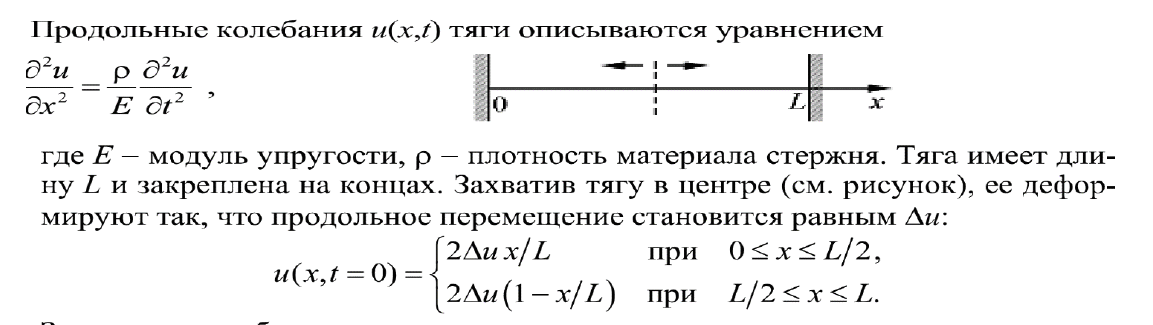

Затем тяга освобождается. Рассчитать колебания $u(x,t)$ при заданных параметрах

$L=6 см, \nabla u = 0.15 см, E= 82*10^9 \frac{Н}{м^2}, \rho = 9700 \frac{кг}{м^3}$

### Решение

Составим разностную схему решения волнового уравнения:

### $\frac{u^t_{i+1} - 2u^t_i+u^t_{i-1}}{h^2} = \frac{\frac{\rho}{E} * u^{t-1}_i - 2u^t_i + u_i^{t+1}}{\tau^2}$

Отсюда $u_i^{t+1} = 2u^t_i -u^{t-i}_i+ \gamma^2(u^t_{i+1} - 2u^t_i+u^t_{i-1})$

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

In [2]:
L = 0.1
du = 0.0015
E = 82e9
rho = 9700

tau = 0.005
h = 0.005
T = 1
c = 0.1

In [3]:
xs, ts = np.arange(0, L + h, h), np.arange(0, T + tau, tau)
nx, nt = len(xs), len(ts)

In [4]:
u = np.zeros((nt, nx))

xs_center = xs[1:-1]
gamma = tau / h * c

#### Инициализируем первый слой

In [5]:
for i, x in enumerate(xs):
    coeff = x / L if x <= L / 2 else (1 - x / L)
    u[0][i] = 2 * du * coeff

#### Инициализируем второй слой

In [6]:
for i, x in enumerate(xs_center, 1):    
    u[1][i] = u[0][i] + gamma**2 / 2 * (u[0][i + 1] - 2 * u[0][i] + u[0][i - 1]) 

In [7]:
for n, t in enumerate(ts[2:], 2):
    for i, x in enumerate(xs_center, 1):
        u[n][i] = 2 * u[n - 1][i] - u[n - 2][i] + gamma**2 * (u[n - 1][i + 1] - 2 * u[n - 1][i] + u[n - 1][i - 1])

Подставив начальные условия, найдем значения сетки с помощью явной схемы.

Результат работы программы разных шагах по $xut$

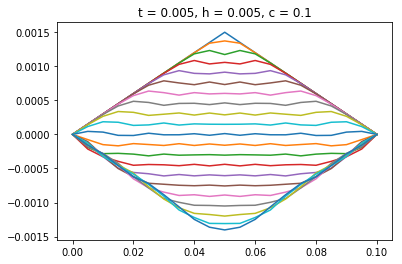

In [9]:
for n in range(0, nt, 10):
    plt.title('t = {}, h = {}, c = {}'.format(tau, h, gamma))
    plt.plot(xs, u[n])

plt.show()

In [11]:
def plot_1(L, du, E, rho,
          tau, h, T, c):
    xs, ts = np.arange(0, L + h, h), np.arange(0, T + tau, tau)
    nx, nt = len(xs), len(ts)

    u = np.zeros((nt, nx))

    xs_center = xs[1:-1]
    gamma = tau / h * c

    for i, x in enumerate(xs):
        coeff = x / L if x <= L / 2 else (1 - x / L)
        u[0][i] = 2 * du * coeff

    for i, x in enumerate(xs_center, 1):    
        u[1][i] = u[0][i] + gamma**2 / 2 * (u[0][i + 1] - 2 * u[0][i] + u[0][i - 1]) 

    for n, t in enumerate(ts[2:], 2):
        for i, x in enumerate(xs_center, 1):
            u[n][i] = 2 * u[n - 1][i] - u[n - 2][i] + gamma**2 * (u[n - 1][i + 1] - 2 * u[n - 1][i] + u[n - 1][i - 1])

    for n in range(0, nt, 10):
        plt.title('t = {}, h = {}, c = {}'.format(tau, h, gamma))
        plt.plot(xs, u[n])

    plt.show()

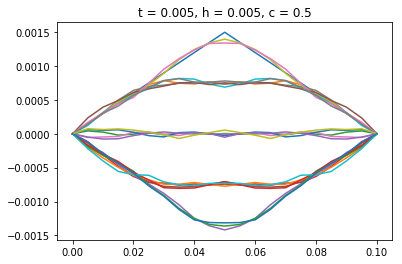

In [13]:
L = 0.1
du = 0.0015
E = 82e9
rho = 9700

tau = 0.005
h = 0.005
T = 1
c = 0.5

plot_1(L, du, E, rho,
      tau, h, T, c)

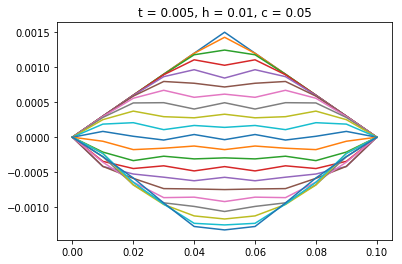

In [20]:
L = 0.1
du = 0.0015
E = 82e9
rho = 9700

tau = 0.005
h = 0.01
T = 1
c = 0.1

plot_1(L, du, E, rho,
      tau, h, T, c)

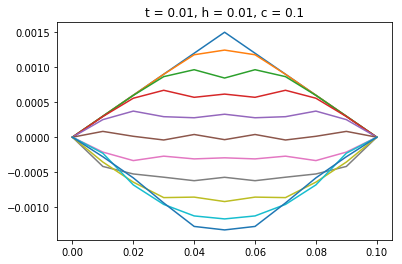

In [15]:
L = 0.1
du = 0.0015
E = 82e9
rho = 9700

tau = 0.01
h = 0.01
T = 1
c = 0.1

plot_1(L, du, E, rho,
      tau, h, T, c)

Колебания струны в разные моменты времени при $h=0.005, \tau=0.005$

<IPython.core.display.Javascript object>


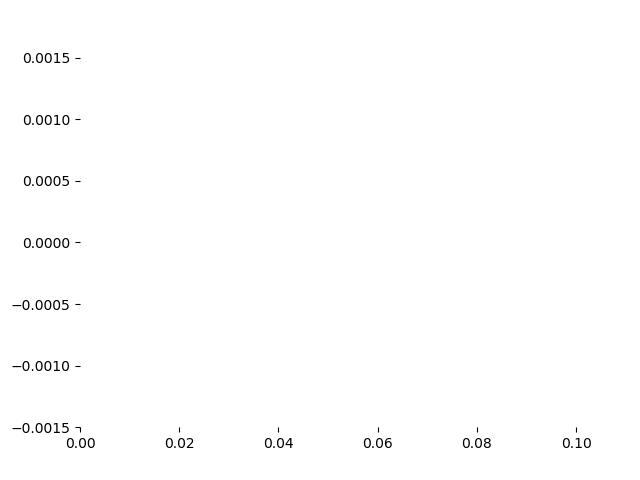

In [21]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import animation

fig = plt.figure() 
ax = plt.axes(xlim=(0, L), ylim=(-du, du)) 
line, = ax.plot([], [], lw=2) 

# initialization function: plot the background of each frame 
def init(): 
    line.set_data([], []) 
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    line.set_data(xs, u[i]) 
    return line, 

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=600, interval=30, blit=True) 

plt.show();

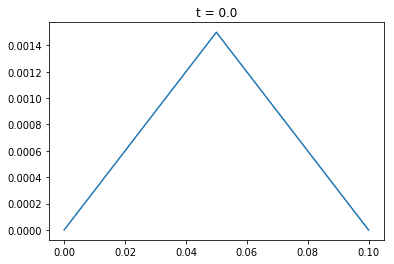

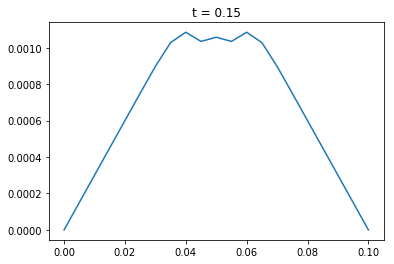

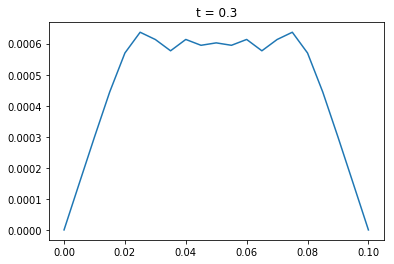

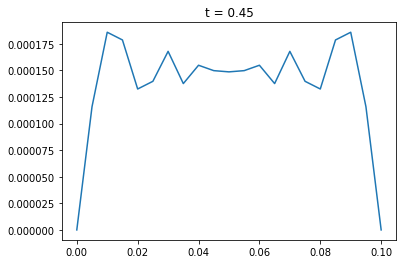

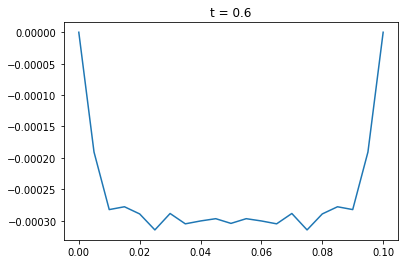

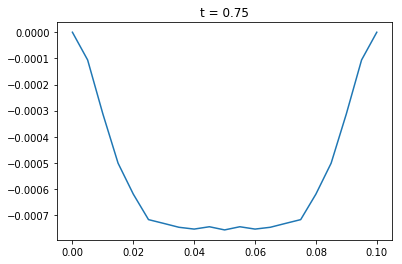

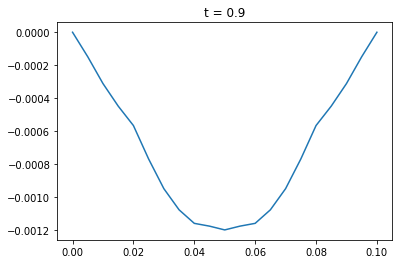

In [11]:
%matplotlib inline
for n in range(0, nt, 30):
    plt.plot(xs, u[n])
    plt.title('t = {}'.format(ts[n]))
    plt.show()

### Задание 2

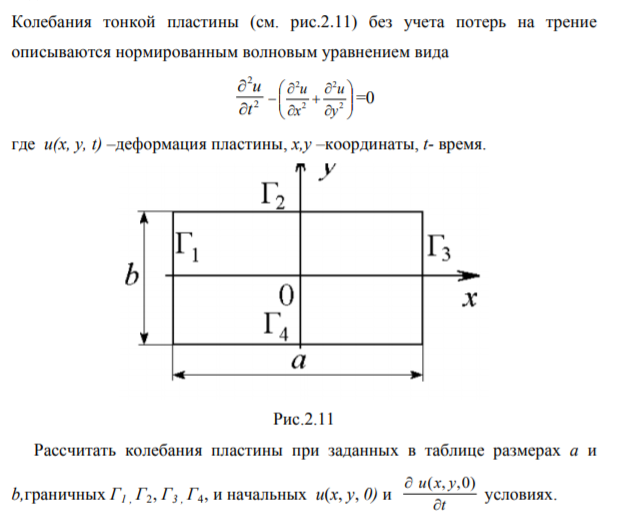

$a=2, b=2, Г_1:u=0, Г_2:\frac{du}{dn}=0, Г_3:=0, Г_4:\frac{du}{dn}=0$

### Решение

### $u^{t+1}_{i,j} = 2u^{t}_{i,j} - u^{t-1}_{i,j} + \tau^{2}(\frac{u^{t}_{i-1,j} - 2u^{t}_{i,j} + u^{t}_{i+1,j}}{\nabla x^2} + \frac{u^{t}_{i,j-1} - 2u^{t}_{i,j} + u^{t}_{i,j+1}}{\nabla y^2})$

#### Граничные условия первого рода

$u^{0}_{i,j} = 2 cos(\frac{\pi x}{a})$

#### Аппроксимация граничных условий второго рода

### $u^{t+1}_{i,0} = 2u^{t}_{i,0} - u^{t-1}_{i,0} + \tau^{2}(\frac{u^{t}_{i-1,0} - 2u^{t}_{i,0} + u^{t}_{i+1,0}}{\nabla x^2} + \frac{- 2u^{t}_{i,0} + u^{t}_{i,1}}{\nabla y^2})$

### $u^{t+1}_{i,n} = 2u^{t}_{i,n} - u^{t-1}_{i,n} + \tau^{2}(\frac{u^{t}_{i-1,j} - 2u^{t}_{i,j} + u^{t}_{i+1,j}}{\nabla x^2} + \frac{- 2u^{t}_{i,n} + u^{t}_{i,n-1}}{\nabla y^2})$

Результат работы программы при $h=0.1m \tau=0.05$ в разные моменты времени:


In [33]:
import math
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [34]:
a = 2
b = 2

h = 0.1
tau = 0.05
T = 4

gamma = tau / h

In [35]:
xs = np.arange(-a / 2, a / 2 + h, h)
ys = np.arange(-b / 2, b / 2 + h, h)
ts = np.arange(0, T + tau, tau)

nx = len(xs)
ny = len(ys)
nt = len(ts)

u = np.zeros((nt, ny, nx))

In [36]:
u[0, :] = 2 * np.cos(math.pi * xs / a)

In [37]:
for i in range(0, ny):
    for j in range(1, nx - 1):
        if i == 0:
            y_coeff = -2 * u[0, i, j] + 2 * u[0, i + 1, j]
        elif i == ny - 1:
            y_coeff = -2 * u[0, i, j] + 2 * u[0, i - 1, j]
        else:
            y_coeff = u[0, i - 1, j] - 2 * u[0, i, j] + u[0, i + 1, j]
            
        u[1, i, j] = u[0, i, j] + gamma**2 / 2 * (
            u[0, i, j - 1] - 2 * u[0, i, j] + u[0, i, j + 1] + \
            y_coeff 
        ) + tau * np.tan(np.sin(2 * math.pi * xs[j] / a)) * np.sin(math.pi * ys[i] / b)

In [38]:
for t in range(2, nt):
    for i in range(0, ny):
        for j in range(1, nx - 1):
            if i == 0:
                y_coeff = -2 * u[t - 1, i, j] + 2 * u[t - 1, i + 1, j]
            elif i == ny - 1:
                y_coeff = -2 * u[t - 1, i, j] + 2 * u[t - 1, i - 1, j]
            else:
                y_coeff = u[t - 1, i - 1, j] - 2 * u[t - 1, i, j] + u[t - 1, i + 1, j]
                
            u[t, i, j] = 2 * u[t - 1, i, j] - u[t - 2, i, j] + gamma**2 * (
                u[t - 1, i, j - 1] - 2 * u[t - 1, i, j] + u[t - 1, i, j + 1] + y_coeff)

In [39]:
def plot_2(u):
    x_grid, y_grid = np.meshgrid(xs, ys)

    surface = go.Surface(x=x_grid, y=y_grid, z=u)
    data = [surface]

    layout = go.Layout(
        title='Parametric Plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='t',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                title='u(x, t)',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, auto_open=True)

In [40]:
import time

for i in range(0, nt, 30):
    plot_2(u[i])
    time.sleep(0.5)

<IPython.core.display.Javascript object>


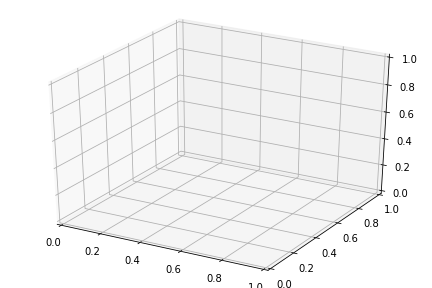

In [44]:
%matplotlib notebook
%matplotlib notebook

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

x_grid, y_grid = np.meshgrid(xs, ys)

fig = plt.figure() 
ax = p3.Axes3D(fig) 
line = ax.plot_surface(x_grid, y_grid, u[0])

# initialization function: plot the background of each frame 
def init(): 
    line = ax.plot_surface(x_grid, y_grid, u[0])
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    ax.clear()
    line = ax.plot_surface(x_grid, y_grid, u[i])
    return line, 

ax.set_xlim3d([-a/2, a/2])
ax.set_xlabel('X')

ax.set_ylim3d([-b/2, b/2])
ax.set_ylabel('Y')

ax.set_zlim3d([-2.5, 2.5])
ax.set_zlabel('Z')

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=800, interval=20, blit=True) 

plt.show()

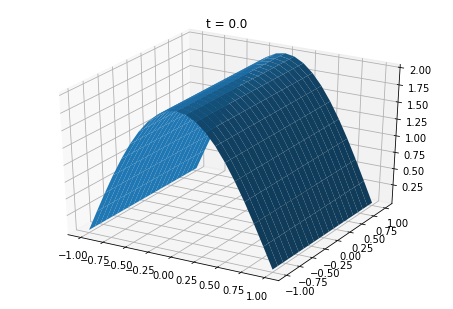

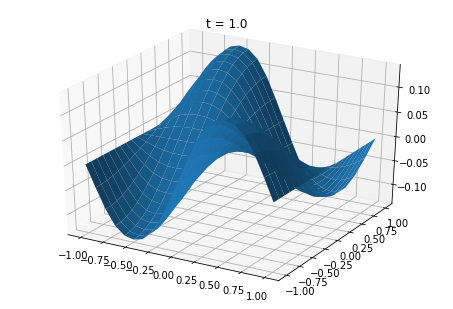

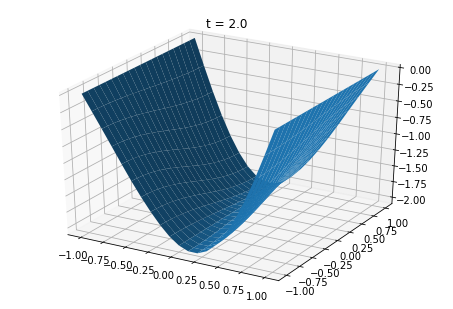

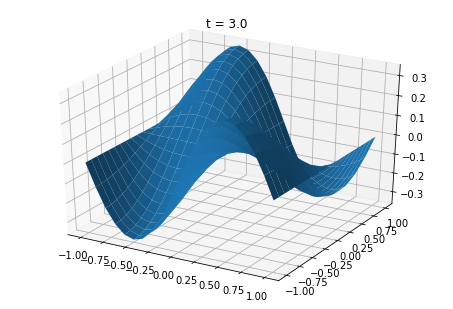

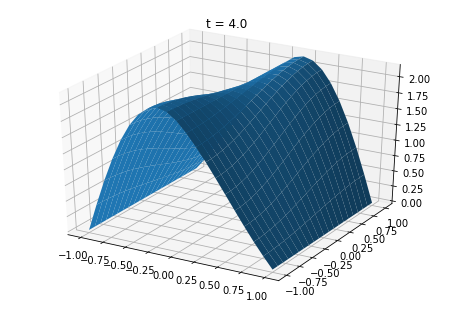

In [42]:
%matplotlib inline

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

x_grid, y_grid = np.meshgrid(xs, ys)



for i in range(0, nt, 20): 
    fig = plt.figure() 
    ax = p3.Axes3D(fig) 
    ax.clear()
    plt.title('t = {}'.format(ts[i]))
    line = ax.plot_surface(x_grid, y_grid, u[i])
    plt.show();

## Вывод 

В результате данной работы был изучен метод сеток численного решения одномерного и двумерного уравнений теплопроводности, а также составлен алгоритм и программный продукт, решающий эту задачу.